# Network science

Network science is a discipline that deals with systems —made of many elements— and studies how the connectivity of the system affects its observed behavior. 
Examples of applications of network science are ecosystems, biological pathways, gene regulatory networks or neural networks.


### Why networks?

One can wonder what's the point of using network models to describe natural phenomena made of heterogeneous elements connected among them. The reason is that the graph formalism allows us to describe complex phenomena based on its network properties which we can quantified with the quantities we will define below. Here's some examples of use cases:

  - We want to characterise networks in order to change them so we can improve their behaviour (eg. the network of world's airport: improve the efficiency of traveling between countries).
  - We want to characterise them so we can compare to check if they're behaving normally, eg. check if  gene regulatory network is behaving normally or there is some malfunctioning or if they're "real" network, eg. is a given twitter is made of humans or of *russian* bots. 

In both cases, the healthy —or real— network is used as the null model for testing some *malfunction* hypothesis.

The so called **Network Neuroscience** is a growing field which uses network methods to study the brain. For instance to build [functional brain networks based on EEG/MEG or fMRI](https://www.frontiersin.org/articles/10.3389/fnsys.2010.00016/full) which can be used to characterise healthy vs clinical conditions or [guide surgical procedures like epilepsy surgery](https://n.neurology.org/content/96/5/e758).

<br>
<br>
<div align="center">
<p style="text-align:center;"><img src="https://n.neurology.org/content/neurology/96/5/e758/F1.large.jpg" width="600"/>
</div>

## Basic network concepts


### Nodes and edges

A network —or graph— is a set of nodes —or vertices— and the connections between them named links —or edges—. A network size is defined as it number of nodes $N$. Two nodes are said to be **adjacent** if they are connected by single edge. Mathematically, it's usually notated as $G = (V,E)$, ie. a graph $G$ is a set of vertices $V$ and edges $E$.


### Network Connectivity

The connectivity of network can be given as 

- Adjacency matrix: a square matrix whose values (0 or 1) indicated the presence or not of edge between 2 nodes. It gives the connection configuration of the network. Each row —and each column— represents one node of the network, eg. 1st row encodes the connections of the *node 1* of the network.
- Connectivity matrix: the same as the adjacency matrix.
- Weight matrix: same idea as the adjacency matrix but now, instead of having zeros and ones, we have real values which represent the strength of the connection.

<br>
<div align="center">
<p style="text-align:center;"><img src="https://mathworld.wolfram.com/images/eps-svg/AdjacencyMatrix_1002.svg" width="500"/>
</div>


### Connected Network 
A network is said to be **connected** if there exist a path between any pairs of nodes in the network. Two networks between which there is not path are said to be **disjoint**.


A network can often be sub-divided in separated clusters, where all nodes within each cluster are directly or indirectly connected, but where no path exist between different clusters. In matrix notation these clusters could be mapped into a matrix A with a **block diagonal matrix** (each block corresponding to a cluster). 


### Directed vs undirected network

A network is said to be directed if the connections between the node have directionality:

<div align="center">
<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Directed_graph.svg" width="300"/>
</div>

If the network is non-directed the adjacency matrix will be symmetrical.


### Graphs with features
Nodes may contain features, such as activations:

<div align="center">
<p style="text-align:center;"><img src="https://github.com/BergLab/CompNeuroBook/blob/main/notebooks/network_theory/graphfeatures.png?raw=true" width="500"/>
</div>

In this case, we can represent the structure of the graph with the weight / adjacency $W$ matrix and the features of the nodes with a vector $F$. The product $W F$ represents a new feature vector representing the propagation of the features values across the network, i.e. the feature value of a node will be the sum of the features of its connected nodes weighted by the respective edge values.

#### Features normalisation

A common practice prevent the explossion of the features of a graph is to normalise by using the **degree matrix** $D$: diagonal matrix that contains information about the number of edges attached to each vertex. So we get: $F_{normalised} = D^{-1} W F$  

#### Feature activation

Like in machine learning neural networks, we can apply a non-linearity $\sigma$ to the output of the feature propagation:

$F^{'} = \sigma(D^{-1} W F )$  

#### Extra Linear transformations

Extra linear transformations —equivalent to linear layers in ANN— can be addded by simply adding an extra learnable matrix $L$. Remeber linar applications are not commutative.

$F^{'} = \sigma(L W D^{-1} F )$  

## Using NetworkX

[NetworkX](https://networkx.guide/) is a Python library for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. Check [the gallery](https://networkx.org/documentation/stable/auto_examples/index.html) to get a sense of what can be done with it. 

Let's start by creating and visualizing a simple graph. Notice that we do not need to create the nodes in order to add edges. When adding a edge between two nodes indices, NetworkX will add the corresponding nodes.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.sparse import rand
from numpy.random import default_rng

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18, 12)
plt.rcParams["figure.figsize"] = (16,10)

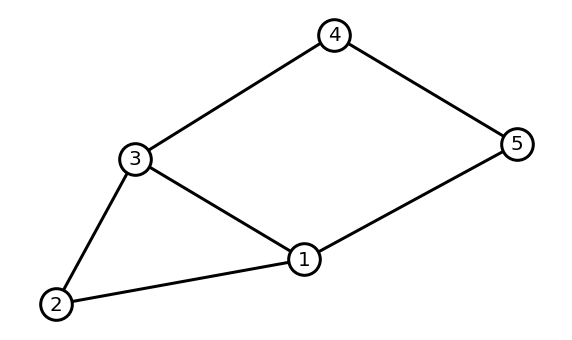

In [3]:
# Create graph G
G = nx.Graph()

# Add edges —nodes are added when specifying the edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)


# Drawing options
drawing_options = {
    "font_size": 20,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
}

# Draw graph G 
plt.figure(figsize=(10,6));
nx.draw_networkx(G, **drawing_options);
plt.axis("off");
plt.show();

Instead of adding the nodes and edges one by one we can use a loop. Let's create a random graph. Notice that since we're randomly sampling the edges we may get a disjoint graph.

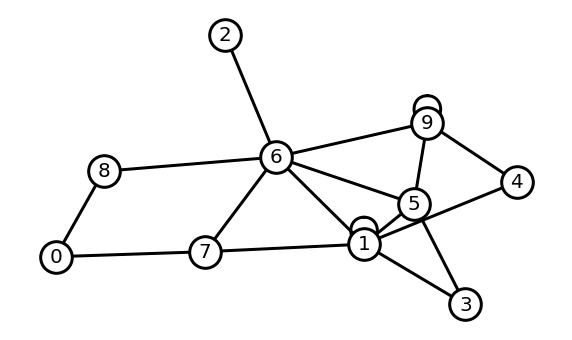

In [4]:
# Create graph G
G = nx.Graph()

# Create a random set of edges
maxNumberOfNodes = 10
numberOfEdges = 20
for _ in range(numberOfEdges):
    edge_from_node = np.random.choice(maxNumberOfNodes) # Sample a random number from [0, maxNumberOfNodes]
    edge_to_node = np.random.choice(maxNumberOfNodes)   # Sample a random number from [0, maxNumberOfNodes]
    G.add_edge(edge_from_node, edge_to_node)   # Add the edge between the random values


# Draw graph G 
plt.figure(figsize=(10,6));
nx.draw_networkx(G, **drawing_options);
plt.axis("off");
plt.show();

We can easily obtain the adjacency matrix representation of the graph:

In [5]:
adjacency_matrix = nx.to_numpy_array(G)
print(adjacency_matrix)

[[0. 1. 1. 1. 1. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]


We can also define a network by creating a adjacency matrix first and using it to build the graph:

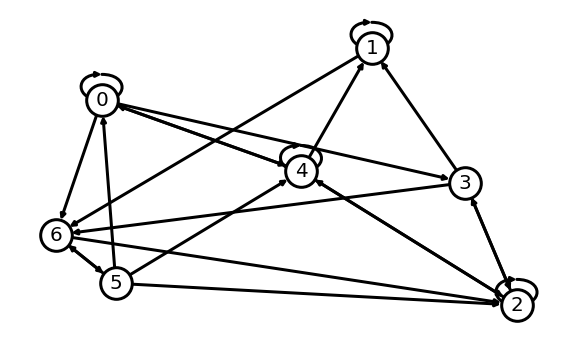

Adjacency matrix:

[[1 0 0 1 1 0 1]
 [0 1 0 0 0 0 1]
 [0 0 1 1 1 0 0]
 [0 1 1 0 0 0 1]
 [1 1 1 0 1 0 0]
 [1 0 1 0 1 0 1]
 [0 0 1 0 0 1 0]]


In [6]:
# Create random network
networkSize = 7
adj_matrix = np.random.randint(low=0, high=2, size=(networkSize, networkSize)) # create a square random matrix with 0s and 1s of of size networkSize
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Draw network
plt.figure(figsize=(10,6));
nx.draw_networkx(G, **drawing_options);
plt.axis("off");
plt.show();

# Print Adjacency matrix matrix 
print(f"Adjacency matrix:\n\n{adj_matrix}")


If we want to create a sparse network, then we can do so by creating sparse connectivity matrix:

In [7]:
from scipy import stats, sparse
from numpy.random import default_rng

networkSize = 10
minWeight = -1
maxWeight = 1
sparsity = 0.2

rng = default_rng()
rvs = stats.uniform(loc=minWeight, scale=maxWeight - minWeight).rvs
sparse_adj_matrix = sparse.random(networkSize, networkSize, density=sparsity, data_rvs=rvs).toarray()
G_sparse = nx.from_numpy_array(sparse_adj_matrix)
print(G_sparse)

Graph with 10 nodes and 16 edges


By default, networkX create graphs as undirected even if the adjacency matrix is not symmetric. To create directed graphs we need to add  `create_using=nx.DiGraph` when creating the graph from the adjacency matrix.

Let's created a **weighted directed graph** and draw it with the edge colours indicating the weight value:

/var/folders/jw/bb3wy2wj6bv8jf69svd8cqdc0000gn/T/ipykernel_22386/2232413052.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin = edge_colors.min(), vmax=edge_colors.max())));


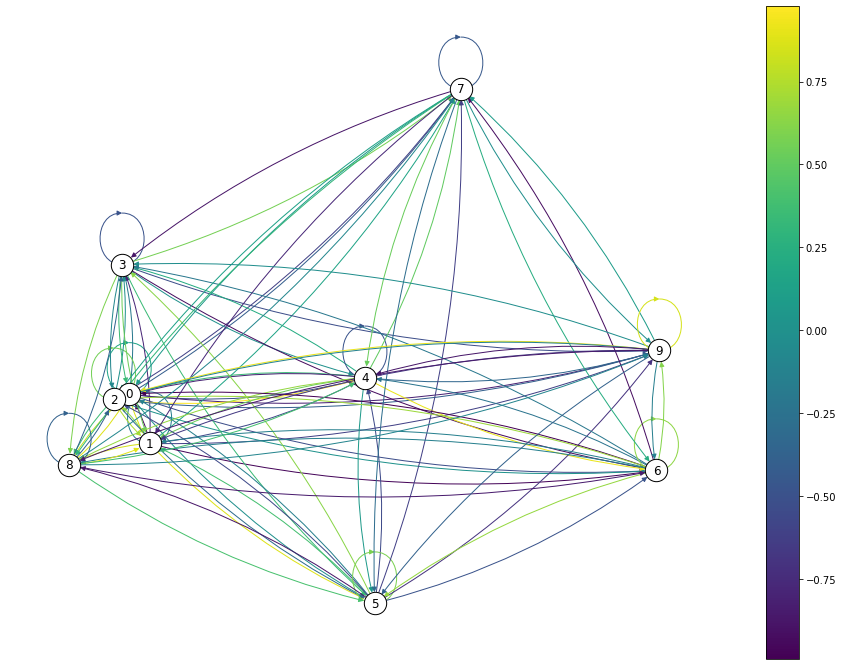

In [8]:
# Create random weighted directed network
networkSize = 10
minWeight = -1
maxWeight = 1
adj_matrix = np.random.uniform(low=minWeight, high=maxWeight, size=(networkSize, networkSize)) # create a square random matrix with 0s and 1s of of size networkSize
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)


plt.figure(figsize=(16,12));
nodes_size = 100*np.array(list(dict(G.degree()).values()))
edge_colors = adj_matrix.flatten()
nx.draw_networkx(G, node_color='white', edgecolors='black', with_labels=True, node_size=500, edge_color = edge_colors, connectionstyle='arc3, rad = 0.1');


plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin = edge_colors.min(), vmax=edge_colors.max())));
plt.axis("off");
plt.show();


#### Exercises 🧑‍💻🔨

  - Write down the connectivity matrices of the following networks (in paper and as a numpy array):

<div align="center">
<p style="text-align:center;"><img src="https://github.com/BergLab/CompNeuroBook/blob/main/notebooks/week5/graphs.png?raw=true" width="500"/>
</div>

  - Using the connectivity matrices you just wrote, create a graph with NetworkX for each of them and draw them using `draw_networkx()` function.

  - How would you would recurrent connections look in the matrix? ie. a nodes that are connected to themselves.

  - What phenomena could be described with a directed network? What phenomena could be described with a non-directed network?


In [9]:
## Your code here

## Measures used to characterise networks

### Degree of connectivity
The average degree —or connectivity—, **k** is the average number of edges per node. Usually we work with the average $<k>$ and the degree distribution which is the probability P(k) that a given node have k links to the remaining N − 1 nodes. 


 
### Distance, diameter and shortest path

The **distance** between two nodes in a network is defined as the minimal number of links that connect them. 

From the concept of distance, we can define, for a connected network, a **diameter** as the longest of all the calculated shortest paths between any two nodes. An example would be in the networks of the world's airports, what's the maximum number of flights you need to take to get to any airport from any airport, similarly, in biological phenomena, there must have been an evolutionary pressure to find optimal pathways for sensory processing.

The **average shortest-path** between any two nodes of a network is a measure of efficiency of information propagation, since you want to be able to any airport as fast as possible.

### Centrality

**Centrality** measures try to rank the importance of the nodes in a network. There exist several ways of defining the centrality of a node, for instance, the **Degree centrality** of a node is its number of links.
Another quantification of a node centrality is *betweenness*. **Betweenness centrality** measures the number of times a node lies on the shortest path between other nodes. We can compute it for a single node, or for the whole network as the average of all nodes betweness. This help define some nodes as hubs is the have high betweenness. **Closeness centrality** ranks each node based on their closeness to all other nodes in the network, ie. the node with the shortest paths to all other nodes rank higher. Which specific centrality measure is best to use depends on the aspect of the specific network we are studying.



Let's use NetworkX to compute these quantities of some networks. Let's start by computing the degrees for every node:

In [10]:
networkSize = 20
p = 0.5 # probability of for a node to be connected to any other node, eg. p=1 all nodes would be connected to each other and p=0 there would not be any edge
G = nx.gnp_random_graph(networkSize, p) # gnp_random_graph function generates a random graph

degree_nodes = G.degree()
print(degree_nodes) # A list of tuples with first number representing the node index and its degree

# Let's print it in a easier to read format
for node in degree_nodes:
  print(f'Node {node[0]} has degree {node[1]}')

[(0, 7), (1, 13), (2, 10), (3, 10), (4, 6), (5, 11), (6, 9), (7, 9), (8, 8), (9, 12), (10, 9), (11, 9), (12, 10), (13, 8), (14, 10), (15, 7), (16, 11), (17, 9), (18, 7), (19, 9)]
Node 0 has degree 7
Node 1 has degree 13
Node 2 has degree 10
Node 3 has degree 10
Node 4 has degree 6
Node 5 has degree 11
Node 6 has degree 9
Node 7 has degree 9
Node 8 has degree 8
Node 9 has degree 12
Node 10 has degree 9
Node 11 has degree 9
Node 12 has degree 10
Node 13 has degree 8
Node 14 has degree 10
Node 15 has degree 7
Node 16 has degree 11
Node 17 has degree 9
Node 18 has degree 7
Node 19 has degree 9


Now that we know how to compute the degree of each node we can visualise the network adding colors to the nodes to represent their degree, ie. blue being low degree and red high degree. We will also display the degree of each node as a number (rather than the node index as we before) and make the size of each node proportional to its degree.

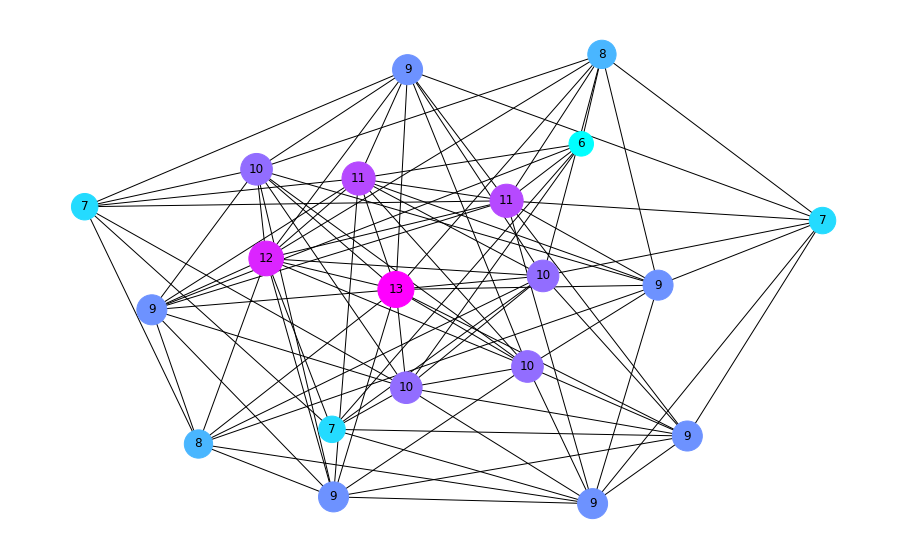

In [11]:
plt.figure(figsize=(16,10))
n_color = np.asarray([G.degree()[n] for n in G.nodes()]) #  color nodes based on their degree
nodes_size = 100*np.array(list(dict(G.degree()).values()))
nx.draw_networkx(G, node_color=n_color, cmap=plt.cm.cool, labels= dict(G.degree()), with_labels=True, node_size=nodes_size);
# plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin = n_color.min(), vmax=n_color.max())))
plt.axis("off");
plt.show();

Now that we know the degree of each node we can compute the **degree distribution**:

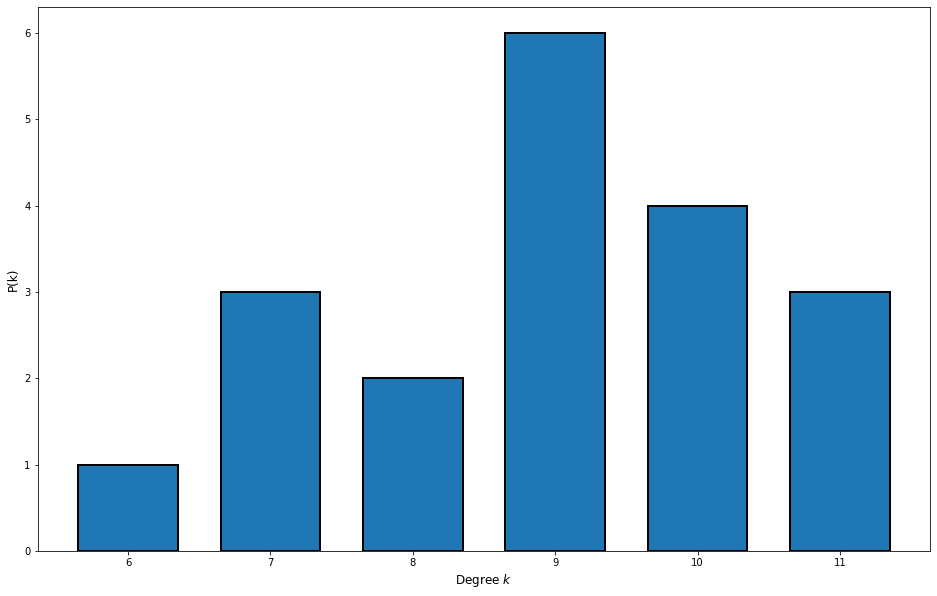

In [12]:
# Create sorted list of the degree of each of the nodes
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

# Create an histogram 
plt.figure(figsize=(16,10));
_bins_ = [bin_value for bin_value in range(min(set(np.array(G.degree())[:,1])), max(set(np.array(G.degree())[:,1])))] 
plt.hist(degree_sequence, bins = _bins_, edgecolor='black', linewidth=2, rwidth=0.7, align='left');
plt.xlabel('Degree $k$', fontsize=12);
plt.ylabel('P(k)', fontsize=12);


Let's also compute the other quantities we have introduced:

In [13]:
print(G)
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Network diameter: {nx.diameter(G)}')
print(f'Average shortest path: {nx.average_shortest_path_length(G)}')

Graph with 20 nodes and 92 edges
Number of nodes: 20
Number of edges: 92
Network diameter: 2
Average shortest path: 1.5157894736842106



#### Exercises 🧑‍💻🔨

  - Use NetworkX `nx.gnp_random_graph(networkSize, p)` to create a random graph with different probability p and sizes and compute its degree distribution. Can you figure out the relation between the probability p and the shape of the degree distribution histogram?

  - Make a figure where you plot the average shortest path as a function of the network size for undirected networks of sizes from 10 to 200. #Hint: create a loop generating a random network at iteration by generating random adjacency matrix with `np.random.randint(low=0, high=2, size=(networkSize, networkSize))`, compute its average shortest path. Is the result surprising?
  - Now compute the same curve but for directed graphs and add them both together in the same figure. Explain why we observe different results for directed and undirected graphs.


### Clustering coefficient 

The clustering coefficient (CC) —or cliquishness— of node represents the fraction of interconnections between neighbors of node i. It's a measure of how much nodes in the network tend to cluster together. Eg. In a social graph it measures the proportion of your friends that are also friends with each other. The global CC of network is simply the average of the CC of all the nodes.


<div align="center">
<p style="text-align:center;"><img src="https://github.com/BergLab/CompNeuroBook/blob/main/notebooks/network_theory/cc.png?raw=true" width="500"/>
</div>

A large clustering coefficient (CC) indicates large locality in the sense that neighbors of a given node tend to be directly connected while if a node has low CC it means that its neighbors aren't connected to each other, eg. high CC is a society where nearly everybody has common friends while low CC: people have friends but these friends don't tend to know each other. 


### Cliques 

A clique is set of nodes which are are all adjacent, that is, there is a direct connection between all pairs of them. You can think of a clique in a social network as a cohesive group of people that are tightly connected to each other. We can define 3-cliques, 4-cliques, etc. You can think of cliques as sub-networks of networks, eg. group of friend who they all know each others, while connections to other cliques represent people who have friends in several groups.

The graph below has:

 - 23 × 1-vertex cliques (the vertices),
 - 42 × 2-vertex cliques (the edges),
 - 19 × 3-vertex cliques (light and dark blue triangles), and
 - 2 × 4-vertex cliques (dark blue areas).

<div align="center">
<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/820px-VR_complex.svg.png" width="400"/>
</div>

The 11 light blue triangles form maximal cliques. The two dark blue 4-cliques are both maximum and maximal, and the clique number of the graph is 4.



### Motifs and motifs analysis

Motifs are sub-graphs present in a network that are responsible for the functions of a network. Some motifs —like positive and negative feedback— are found across networks describing many phenomena. However, much more complex motifs exist. When networks are small we can try to understand the motifs present, however, when network are too big to be understood directly, we can do a **motif network analysis**: we create a set of random networks and compare the distribution of motifs present  in the real network vs the random ones. 


<div align="center">
<p style="text-align:center;"><img src="https://github.com/BergLab/CompNeuroBook/blob/main/notebooks/network_theory/motifs.png?raw=true" width="500"/>
</div>

We can easily compute the clustering coefficient of a graph with NetworkX:

In [14]:
networkSize = 20
p = 0.5 # probability of for a node to be connected to any other node, eg. p=1 all nodes would be connected to each other and p=0 there would not be any edge
G = nx.gnp_random_graph(networkSize, p) # gnp_random_graph function generates a random graph

CC = nx.clustering(G)
CC

{0: 0.6060606060606061,
 1: 0.509090909090909,
 2: 0.509090909090909,
 3: 0.4222222222222222,
 4: 0.5555555555555556,
 5: 0.45454545454545453,
 6: 0.5454545454545454,
 7: 0.5777777777777777,
 8: 0.4727272727272727,
 9: 0.5,
 10: 0.5128205128205128,
 11: 0.5606060606060606,
 12: 0.5357142857142857,
 13: 0.4909090909090909,
 14: 0.5128205128205128,
 15: 0.4909090909090909,
 16: 0.38095238095238093,
 17: 0.5555555555555556,
 18: 0.5555555555555556,
 19: 0.509090909090909}

Notice, that this is the clustering coefficient of each node. If we want to find the global CC, we can simply compute the average:

In [15]:
global_CC = np.mean(list(CC.values())) # We select the values from the dictionary with .values(), then convert them to a list with list() and compute its mean with np.mean()
print(f'The global CC of the network is {global_CC}')

The global CC of the network is 0.5128729603729604



#### Exercise 🧑‍💻🔨

  - Why do you think we found the value we found for the global clustering coefficient? How would you produce a network with a different global CC? Test empirically your conjectured solution by generating a network and computing its global CC.

### Scale free networks

Intuitively, a network is said to be scale-free if we zoom it to a subpart of the network it will look the same as if we zoom out. We can formalize this intuition by noting that the degree distribution $P(k)$ of a scale-free network follows a power law: $P(k) \propto k^{-\gamma}$, where typically $\gamma \in [2,3]$ . That is, we compute the dree of each node, create an histogram and look at the resulting distribution it will be thick-tailed (ie. decays slower than exponential). 

<div align="center">
<p style="text-align:center;"><img src="https://github.com/BergLab/CompNeuroBook/blob/main/notebooks/week5/scale-free.png?raw=true" width="500"/>
</div>



### Small-world networks

A network is defined as having [small world property](https://www.nature.com/articles/30918), when it is having a relatively large clustering coefficient, while still having a small diameter, mathematically this means that the mean shortest path $\mathcal{l}$ between two nodes grows logarithmically with the size $N$ of the network: $\mathcal{l} \propto log(N)$.  Many real world networks are found to have this combination of global accessibility (because of small diameter) and a strong localness (because of high clustering coefficient).


<br>
<br>
<div align="center">
<p style="text-align:center;"><img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2F30918/MediaObjects/41586_1998_Article_BF30918_Fig1_HTML.gif?as=webp" width="500"/>
</div>

Both Scale-free and small-world networks are of interest to neuroscience because they are conjectured to carry similarities to networks found in the the brain.

#### Bonus: Evaluating the small-worldness of a network G

Two quantities are used to characterize small-world netowrks: $\sigma$ and $\omega$. $\sigma$ is the small-worldness coefficient. 
$\sigma = \frac{C/C_{r}}{L/L_{r}}$ where $C$ and $L$ are respectively the average clustering coefficient and average shortest path length of the network. $C_{r}$ and $L_{r}$ are respectively the average clustering coefficient and average shortest path length of an equivalent random graph. A graph is commonly classified as small-world if $\sigma>1$.

The other way of quantifying small-worldness is to compare how much the graph topology rassambles a random network, that can be quantify with $\omega = \frac{L_{r}}{L} - \frac{C}{C_{l}}$ where C and L are respectively the average clustering coefficient and average shortest path length of G. $L_{r}$ is the average shortest path length of an equivalent random graph and $C_{l}$ is the average clustering coefficient of an equivalent lattice graph. Negative values of $\omega$ mean G is similar to a lattice whereas positive values mean G is a random graph. Values close to 0 mean that G has small-world characteristics.


Let's create a scale free network using NetworkX `nx.scale_free_graph()` and compute it's degree distribution histogram to verify that if follows a power law distribution.

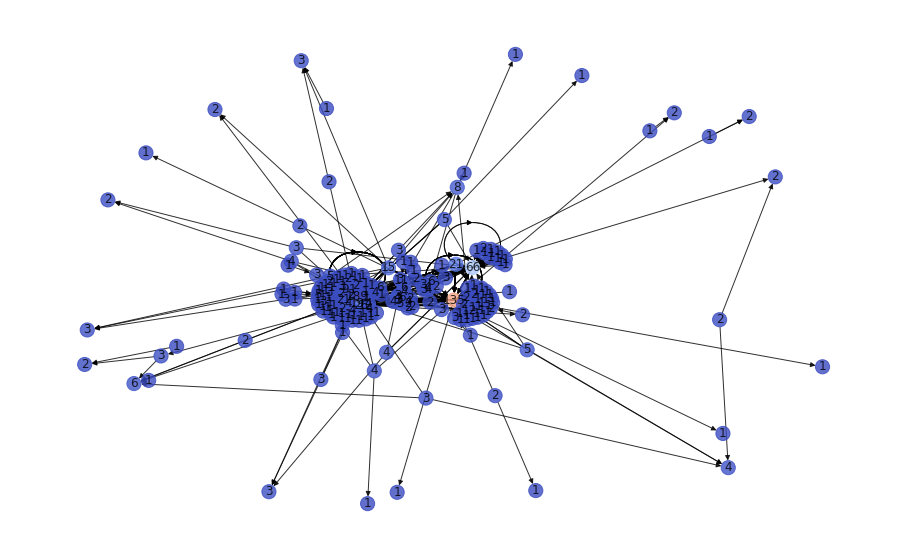

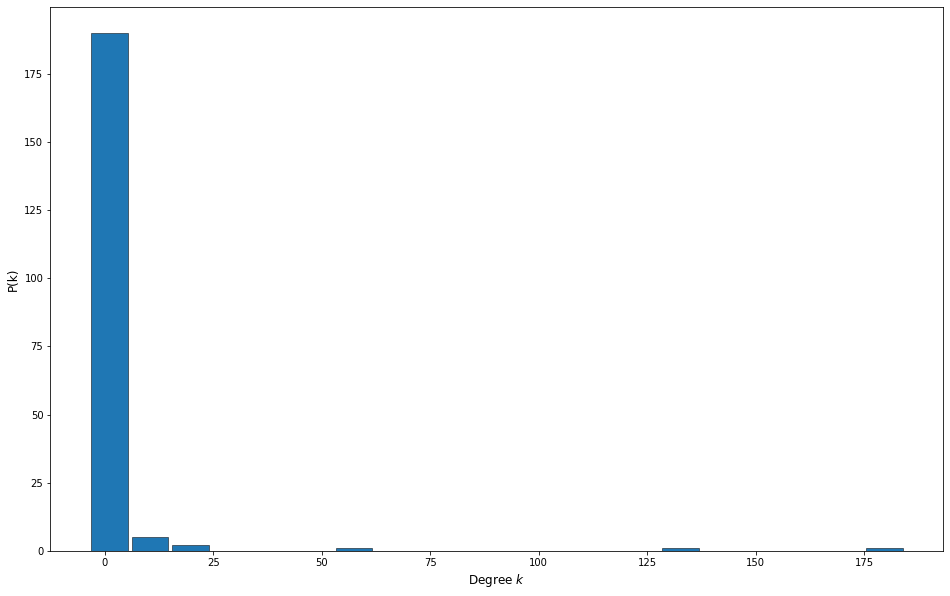

In [16]:
networkSize = 200
G = nx.scale_free_graph(n=networkSize)

plt.figure(figsize=(16,10));
n_color = np.asarray([G.degree()[n] for n in G.nodes()]) #  color nodes based on their degree
nx.draw_networkx(G, node_color=n_color, cmap=plt.cm.coolwarm, labels= dict(G.degree()), with_labels=True, node_size=200, alpha=0.8);
plt.axis("off");
plt.show();


# Create sorted list of the degree of each of the nodes
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

# Create an histogram 
plt.figure(figsize=(16,10));
plt.hist(degree_sequence, bins = 20, edgecolor='black', linewidth=0.5, rwidth=0.9, align='left');
plt.xlabel('Degree $k$', fontsize=12);
plt.ylabel('P(k)', fontsize=12);
# plt.yscale('log')



NetowrkX also allows us to generate small-world networks:

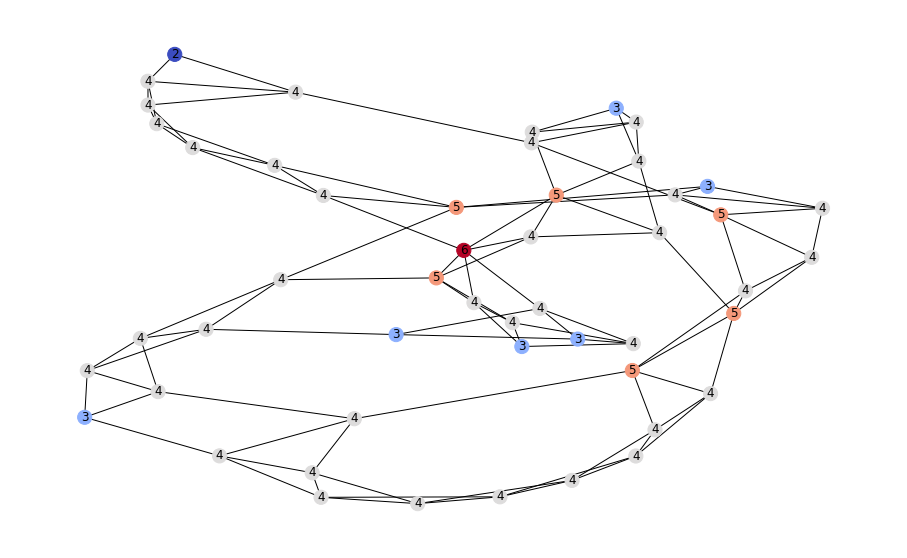

In [17]:
networkSize = 50
smallWorldNet = nx.watts_strogatz_graph(n=networkSize, k=5, p=0.1)

plt.figure(figsize=(16,10));
n_color = np.asarray([smallWorldNet.degree()[n] for n in smallWorldNet.nodes()]) #  color nodes based on their degree
nx.draw_networkx(smallWorldNet, node_color=n_color, cmap=plt.cm.coolwarm, labels= dict(smallWorldNet.degree()), with_labels=True, node_size=200, alpha=1);
plt.axis("off");
plt.show();

Bonus: $\sigma$ and $\omega$ are two quantities used to charectise small world networks. Let's compare their values for a random and small world network.

⚠️ The cell below will take some time to run for big networks ⚠️

In [18]:
import time
tic = time.time()
omega = nx.omega(smallWorldNet)
toc = time.time()
print(f'Omega of the network is {omega} and it took {toc-tic} seconds to compute it')

Omega of the network is -0.274748490945674 and it took 10.508280038833618 seconds to compute it


In [19]:
import time
tic = time.time()
omega = nx.sigma(smallWorldNet)
toc = time.time()
print(f'Sigma of the network is {omega} and it took {toc-tic} seconds to compute it')

KeyboardInterrupt: 

In [21]:
omega = nx.omega(smallWorldNet)
sigma = nx.sigma(smallWorldNet)
print(f'Omega: {omega}, Sigma: {sigma}')

Omega: -0.3297312828814243, Sigma: 4.511823899371069


#### Exercise 🧑‍💻🔨
 
  - Compute the diameter, the average shortest path and the global CC for a small-worlds network and a scale free one (of the same size) and compare them. Discuss the difference and make you understand what why these quantities are different for those two network topologies.


In [ ]:
## Your code here

### Propagation -or replication- in a network


Similarly to how we implemented the SIR Model for Spread of Disease in week 1 by using a matrix to describe the evolution of a viral infection, the adjacency matrix can be used to model **propagation -or replication-** in the network -like a viral infection or information propagation- where we model the state of infection of the people by a state vector $s$ —a vector made of the state of each node: 0 if healthy, 1 if infected— and each propagation step of the virus can be seen as applying the adjacency matrix $M$ to $s$: $s(t+1) = M s(t)$.


If the diagonal is zero, it means that whichever thing is transmitted is not preserved by the node, eg. money transmission. For virus transmission for example, diagonal would be one because the virus stays in the person (at least for some time). 

An useful quantity to describe a propagation phenomena in a network —virus, money, information,..— is the **amplification factor** $A$. If a virus in a node spread to all the adjacent nodes of that node, then the amplification —Assuming transmission between all nodes is bidirectional (undirected network)— is: $A = \frac{<k^{2}>}{<k>} -1$ where <k> is the average degree of connectivity. 

 - When A > 1 then “disease like” signals tends to be exponentially amplified, and therefore will spread across the entire network, this of course reflects a high connectivity of the network. 

 - For A = 1, on the other hand, perturbations will be marginal spreading, where some will spread and others will “die-out”. In this case we need to have an average of 1 output per 1 input. This case will lead to a power law distribution of clusters size. 

A can also be used to estimate the **robustness** of the overall connectedness of the network against removal of a fraction f of its nodes, and hence evaluate the robustness of the network (defined as the resistance against the removal of a fraction of its nodes while preserving the propagation process it does, eg. viral propagation). This is useful therefore to know for example how many people we need to vaccinate to stop an epidemic or to build robust transportation or communication networks.


### Diffusion in a network

If we take the adjacency matrix and replace its non-zero values by a weight representing the strength of the connection we obtain the **transfer matrix** $T$ (provided that the sum of weights for each node is equal to 1). The transfer matrix describe a diffusion process in a network. In a diffusion process we observed a continuous propagation of a given quantity —as opposed to the binary propagation in replication.

The eigenvalues of the transfer matrix gives information about how fast the diffusion process expand/contract. 

### Spectral graph theory

As it is always the case when working with matrices, we can derive certain network properties from the connectivity matrix eigenspectrum, this is referred as [Spectral graph theory](https://en.wikipedia.org/wiki/Spectral_graph_theory). We won't elaborate more on this but let us show that it is straightforward to compute the eigenvalues of a graph using NetworkX and numpy:

In [ ]:
import numpy.linalg

networkSize = 1000
numberOfEdges = 10000
G = nx.gnm_random_graph(networkSize, numberOfEdges)

L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.figure(figsize=(12,9))
plt.hist(e, bins=100, edgecolor='black', linewidth=0.5, rwidth=0.5) 
plt.xlabel('Eigenvalue', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
